In [3]:
import tensorflow as tf 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

begin=time.time()

total_box=[]
scales=[]
img=cv2.imread(r'C:\\Users\\312\\Desktop\\1.jpg')

img=cv2.resize(img,(224,224))
factor=0.9
large=2270/max(img.shape[0:2])
scale=large
small=large*min(img.shape[0:2])
i=j=0
while small>=224:
    scales.append(scale)
    scale*=factor
    small*=factor
    j+=1
print(j)
for scale in scales:

    scale_img=cv2.resize(img,((int(img.shape[0]*scale)),(int(img.shape[1]*scale))))
    boxes=featuremap(scale_img,scale)

    if(boxes):
        for box in boxes:
            total_box.append(box)
            i+=1
    print(i)
    
k=NMS(total_box)
print(time.time()-begin)

22
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt
0
INFO:tensorflow:Restoring parameters from C:\Users\312\Desktop\face_detection_Alexnet\model_50000\model.ckpt


In [1]:
def featuremap(img,scale):
    boundingBox=[]
    
    graph_path='C:\\Users\\312\\Desktop\\face_detection_Alexnet\\model_50000\\model.ckpt.meta'
    model_path='C:\\Users\\312\\Desktop\\face_detection_Alexnet\\model_50000\\model.ckpt'
    saver=tf.train.import_meta_graph(graph_path)
    blue = (0, 255, 0) 
    stride=32
    
    with tf.Session() as sess:
        
        saver.restore(sess,model_path)
        graph = tf.get_default_graph()

        x=graph.get_tensor_by_name("input/x:0")
        y=graph.get_tensor_by_name("input/prob:0")
        p=graph.get_tensor_by_name("input/is_train:0")
        sliding= graph.get_tensor_by_name("logit:0")
        
        img1=np.reshape(img,(-1,img.shape[0],img.shape[1],img.shape[2]))
        a=sliding.eval(feed_dict={x:img1,y:1,p:False})
#         print(a)
        
#         32
#         for (x,y,z),prob in np.ndenumerate(a):
        c=0
        d=0
        for prob in a:
            if (c*32+224<img.shape[0]):
                c+=1
            else: 
                c=0
                d+=1
            if prob[1]>0.999:
                boundingBox.append([float(c*stride)/scale,float( d*stride)/scale, float(c*stride+227)/scale, float(d*stride+227)/scale,prob[1]])
#                 cv2.rectangle(img1[i],(float(x*stride)/scale,float( y*stride)/scale), (float(x*stride+227)/scale, float(y*stride+227)/scale),blue,3,8,0)
#             print(i)
#             plt.imshow(img1[i])    
#             plt.show()
    #         cv2.imshow("alg_test_1", img1[i]) #20
    #         cv2.waitKey(0) #21
        return boundingBox

In [2]:
def NMS(box):
    
    if len(box) == 0:
        return []
    
    #xmin, ymin, xmax, ymax, score, cropped_img, scale
    box.sort(key=lambda x :x[4])
    box.reverse()

    pick = []
    x_min = np.array([box[i][0] for i in range(len(box))],np.float32)
    y_min = np.array([box[i][1] for i in range(len(box))],np.float32)
    x_max = np.array([box[i][2] for i in range(len(box))],np.float32)
    y_max = np.array([box[i][3] for i in range(len(box))],np.float32)

    area = (x_max-x_min)*(y_max-y_min)
    idxs = np.array(range(len(box)))

    while len(idxs) > 0:
        i = idxs[0]
        pick.append(i)

        xx1 = np.maximum(x_min[i],x_min[idxs[1:]])
        yy1 = np.maximum(y_min[i],y_min[idxs[1:]])
        xx2 = np.minimum(x_max[i],x_max[idxs[1:]])
        yy2 = np.minimum(y_max[i],y_max[idxs[1:]])

        w = np.maximum(xx2-xx1,0)
        h = np.maximum(yy2-yy1,0)

        overlap = (w*h)/(area[idxs[1:]] + area[i] - w*h)

        idxs = np.delete(idxs, np.concatenate(([0],np.where(((overlap >= 0.5) & (overlap <= 1)))[0]+1)))
    
    return [box[i] for i in pick]

In [35]:
k=NMS(total_box)

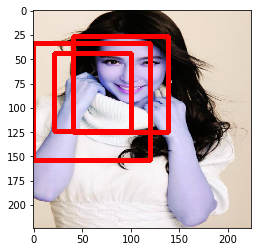

In [4]:
# img=cv2.imread(r'C:\\Users\\312\\Desktop\\image00004.jpg')
blue = (255, 0, 0) 
for a in k:             
    cv2.rectangle(img,(int(a[0]),int(a[1])), (int(a[2]), int(a[3])),blue,3,8,0)
plt.imshow(img)    
plt.show()

In [6]:
total_box[1]

[36.22488674889905,
 36.22488674889905,
 100.46745934264973,
 100.46745934264973,
 array([0.01289472, 0.98710525], dtype=float32)]

In [5]:
len(total_box)

206

In [6]:
len(k)

53

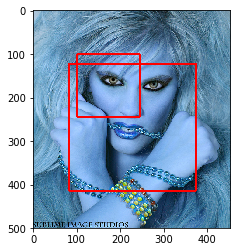

In [19]:
blue = (255, 0, 0) 
for p in k:             
    cv2.rectangle(img,(int(p[0]),int(p[1])), (int(p[2]), int(p[3])),blue,3,8,0)
plt.imshow(img)    
plt.show()

In [15]:
img=cv2.imread(r'E:\\friedhelm\\AFLW\\image00039.jpg')

In [15]:
k

[[46.96009378238354,
  93.92018756476708,
  380.08325905116675,
  427.0433528335503,
  1.0],
 [123.24207012248738,
  154.0525876531092,
  341.8041788553361,
  372.6146963859579,
  1.0],
 [92.43155259186553,
  215.6736227143529,
  310.99366132471425,
  434.2357314472016,
  1.0],
 [110.91786311023864,
  110.91786311023864,
  307.62376096980245,
  307.62376096980245,
  1.0],
 [89.8434691192933,
  89.8434691192933,
  249.17524638554002,
  249.17524638554002,
  0.9999988],
 [112.30433639911662,
  202.14780551840994,
  271.6361136653633,
  361.47958278465666,
  0.9999838],
 [117.89260017833669,
  103.1560251560446,
  222.43017924272118,
  207.69360422042908,
  0.98463655],
 [90.96651248328448,
  145.54641997325515,
  220.0252520689443,
  274.605159558915,
  0.96978956],
 [34.2339083673576,
  136.9356334694304,
  277.0806958483006,
  379.78242095037336,
  0.9619992],
 [150.401484677513,
  118.17259510376022,
  226.6093798154493,
  194.3804902416965,
  0.9541404]]